In [127]:
from os.path import join
from os import listdir

from utils.json_parser import load_json, get_output_path, board_to_str, generate_tuples


In [128]:
input_path: str = join("..", "input")
output_path: str = join("..", "output")

In [129]:
folders_path: list[str] = [join(input_path, f) for f in listdir(input_path)]
files_path: list[str] = [
    join(folder, f)
    for folder in folders_path
    for f in listdir(folder)
    if f.endswith(".json")
]

In [130]:
# states = load_json(files_path[2])

In [131]:
states = load_json(r"..\\input\\match_30_4_2024_3_54_15\\tree_1.json")

In [132]:
import networkx as nx

# Create a tree structure using NetworkX methods for trees
tree = nx.DiGraph()

for state in states.values():
    shape = "box" if state['isMaxNode'] else "ellipse"
    color = "red" if state['value'] < 0 else "green"
    if state['id'] not in list(tree.nodes):
        tree.add_node(state['id'], color=color, shape=shape, label=board_to_str(state).replace(":", ""))
        
    for child_id in state['children']:
        child = states[str(child_id)]
        color = "green" if state['value'] == child['value'] else "red"
        if child['id'] not in list(tree.nodes):
            tree.add_node(child['id'], color=color, shape=shape, label=board_to_str(state).replace(":", ""))
        tree.add_edge(state['id'], child_id, color=color)

C:\Users\danil\AppData\Local\Temp\ipykernel_1988\2326953652.py:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw_networkx(tree, pos=nx.nx_pydot.graphviz_layout(tree))


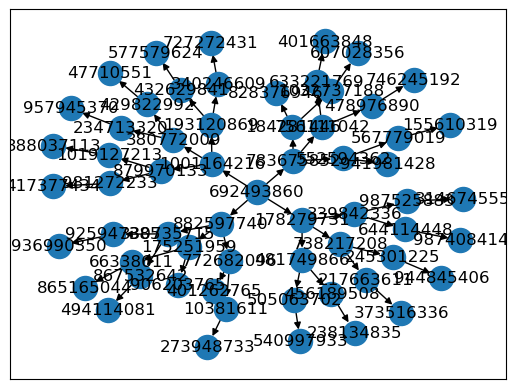

In [182]:
nx.draw_networkx(tree, pos=nx.nx_pydot.graphviz_layout(tree))

C:\Users\danil\AppData\Local\Temp\ipykernel_1988\1679460791.py:2: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(tree, with_labels=True, pos=nx.nx_pydot.graphviz_layout(tree))


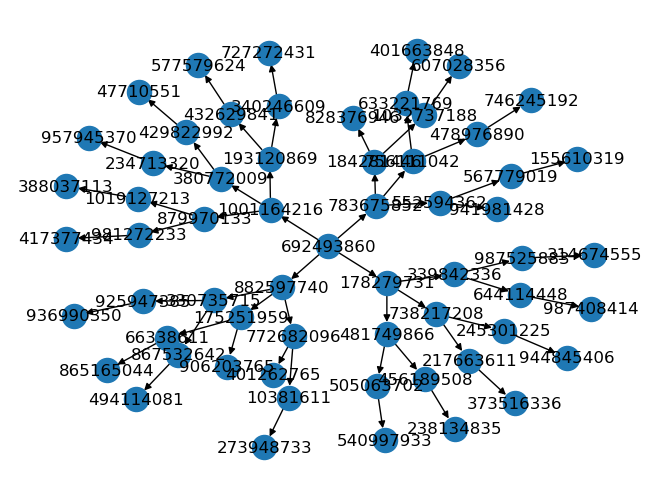

In [173]:
# nx.draw(tree, pos=nx.kamada_kawai_layout(tree, dim=2), with_labels=True)
nx.draw(tree, with_labels=True, pos=nx.nx_pydot.graphviz_layout(tree))

In [138]:
g = nx.drawing.nx_pydot.to_pydot(tree)
# g = nx.nx_agraph.to_agraph(tree)
g.write_dot(join(output_path, "tree.dot"))
g.write_pdf(join(output_path, "tree.pdf"))

C:\Users\danil\AppData\Local\Temp\ipykernel_1988\118138877.py:1: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which hasknown issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  g = nx.drawing.nx_pydot.to_pydot(tree)


In [161]:
from pyvis.network import Network

In [162]:
net = Network(directed=True, height="700px", width="1000px", layout=True)
net.from_DOT(join(output_path, "tree.dot"))
net.show("dot.html", notebook=False)

dot.html
